실습에 해당하는 내용은 책 "혼자 공부하는 머신러닝+딥러닝"을 참고해서 작성했습니다.

# Decision Tree

In [1]:
# 로지스틱 회귀로 와인 분류하기
# class(타깃값)가 0 이면 레드 와인, 1이면 화이트 와인
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
# pandas dataframe을 Numpy로 바꾸고 훈련세트와 테스트세트로 나누기
# 처음 3개 열을 numpy 배열로 바꿔 data에 저장하고 마지막 class 열을 numpy 배열로 바꿔 target에 저장
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
# 훈련세트와 테스트세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 로지스틱 회귀 모델 훈련 (정확도가 낮음)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [10]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [11]:
# 보다 설명하기 쉬운 모델인 Decision Tree
# Test set 점수가 낮은 오버피팅된 모델

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


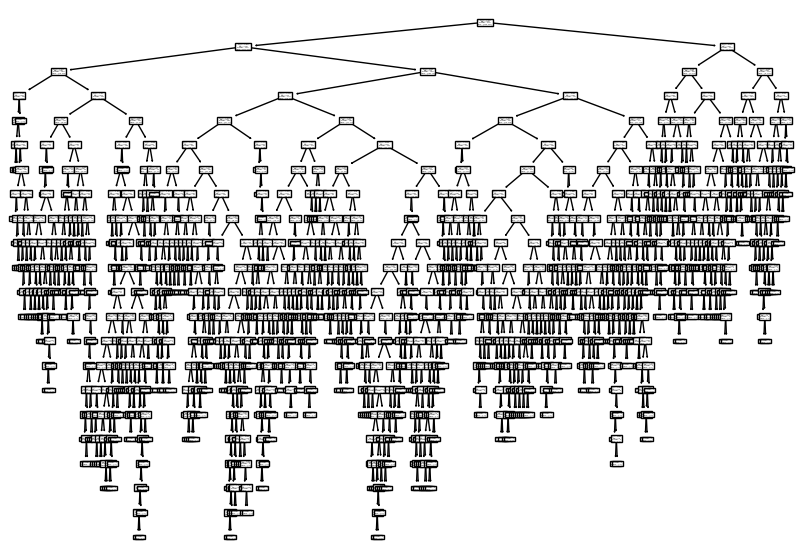

In [12]:
# plot_tree()로 그림으로 출력

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

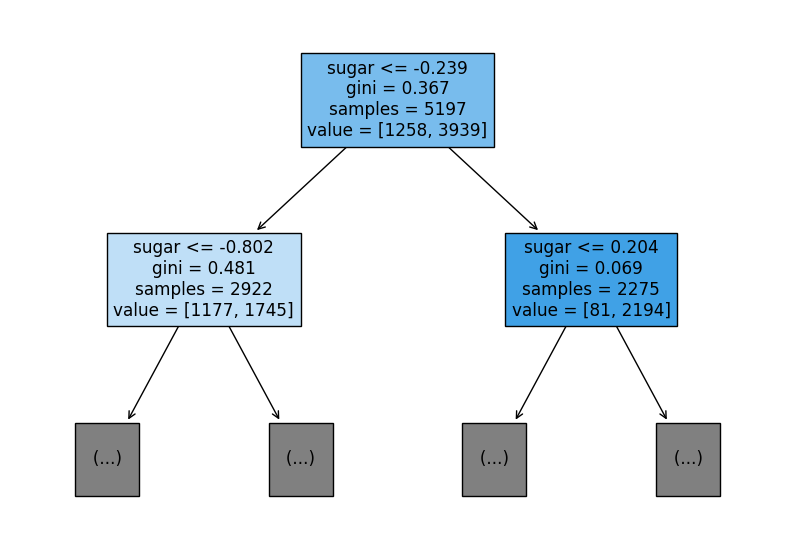

In [13]:
# 트리의 깊이를 제한해서 출력
# max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그림
# feature_names 매개변수에 특성의 이름을 전달

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [14]:
# 가지치기: 자라날 수 있는 트리의 최대 깊이를 지정

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


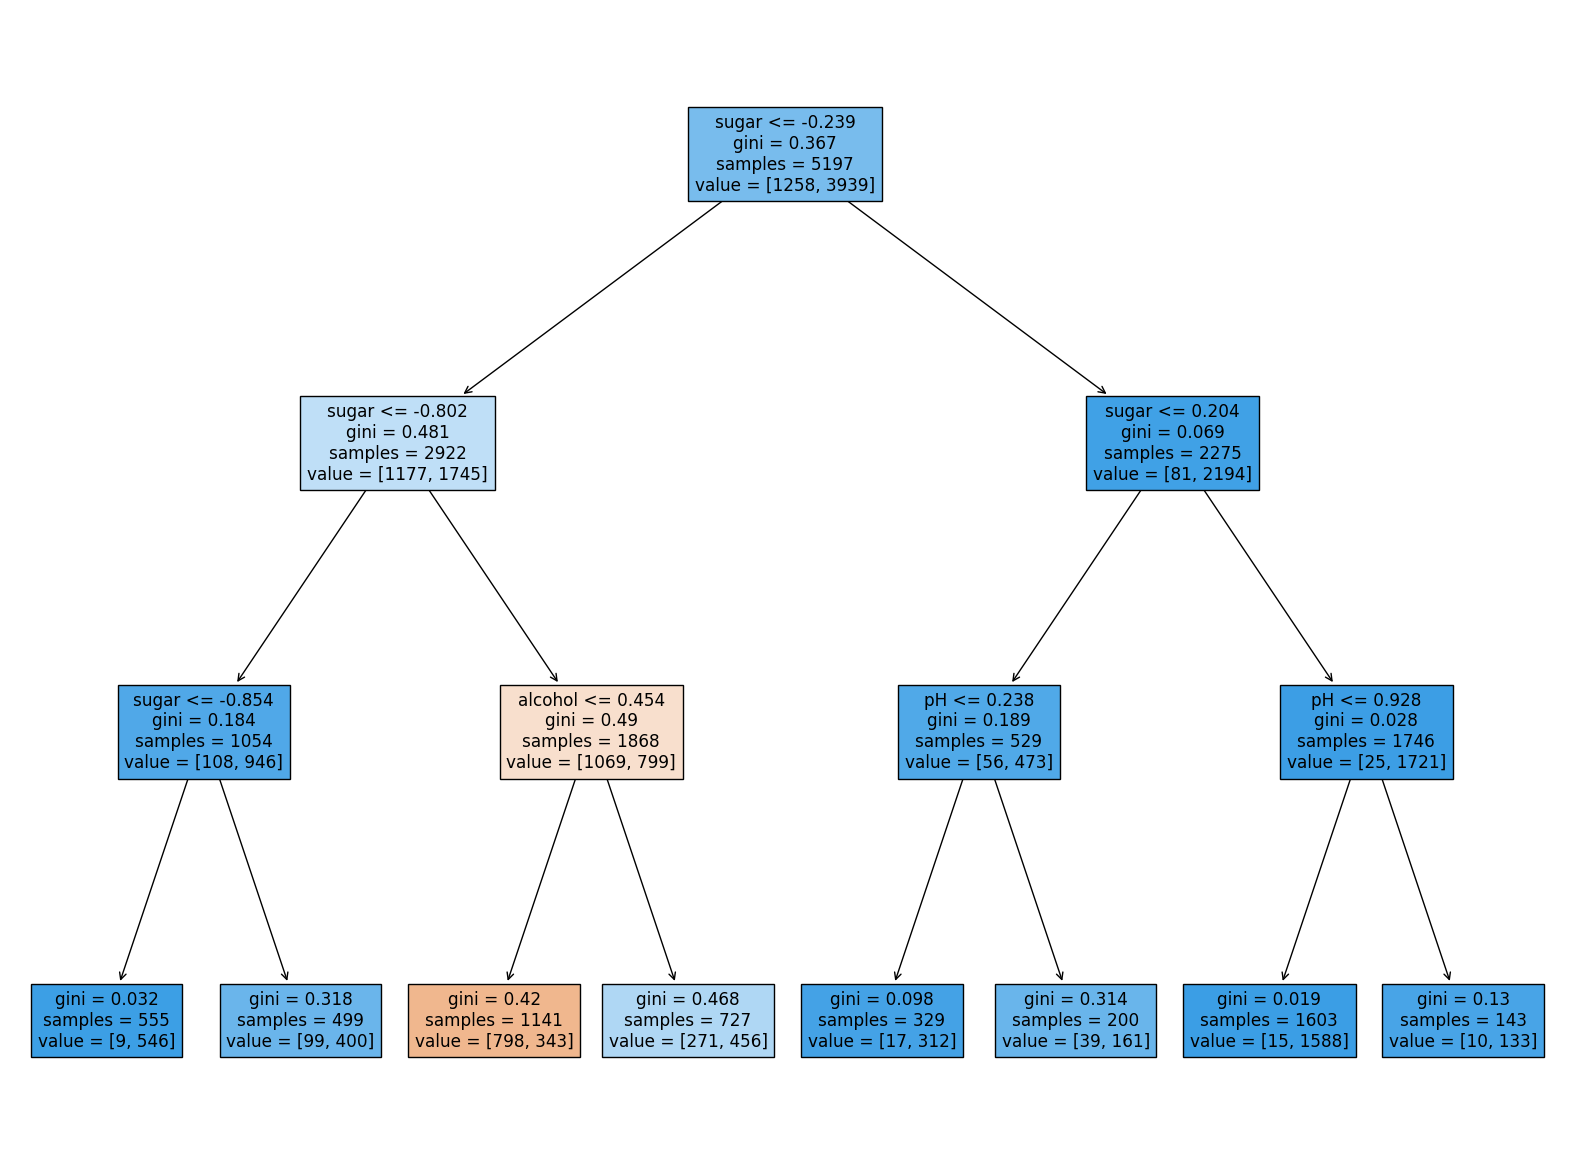

In [15]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [16]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


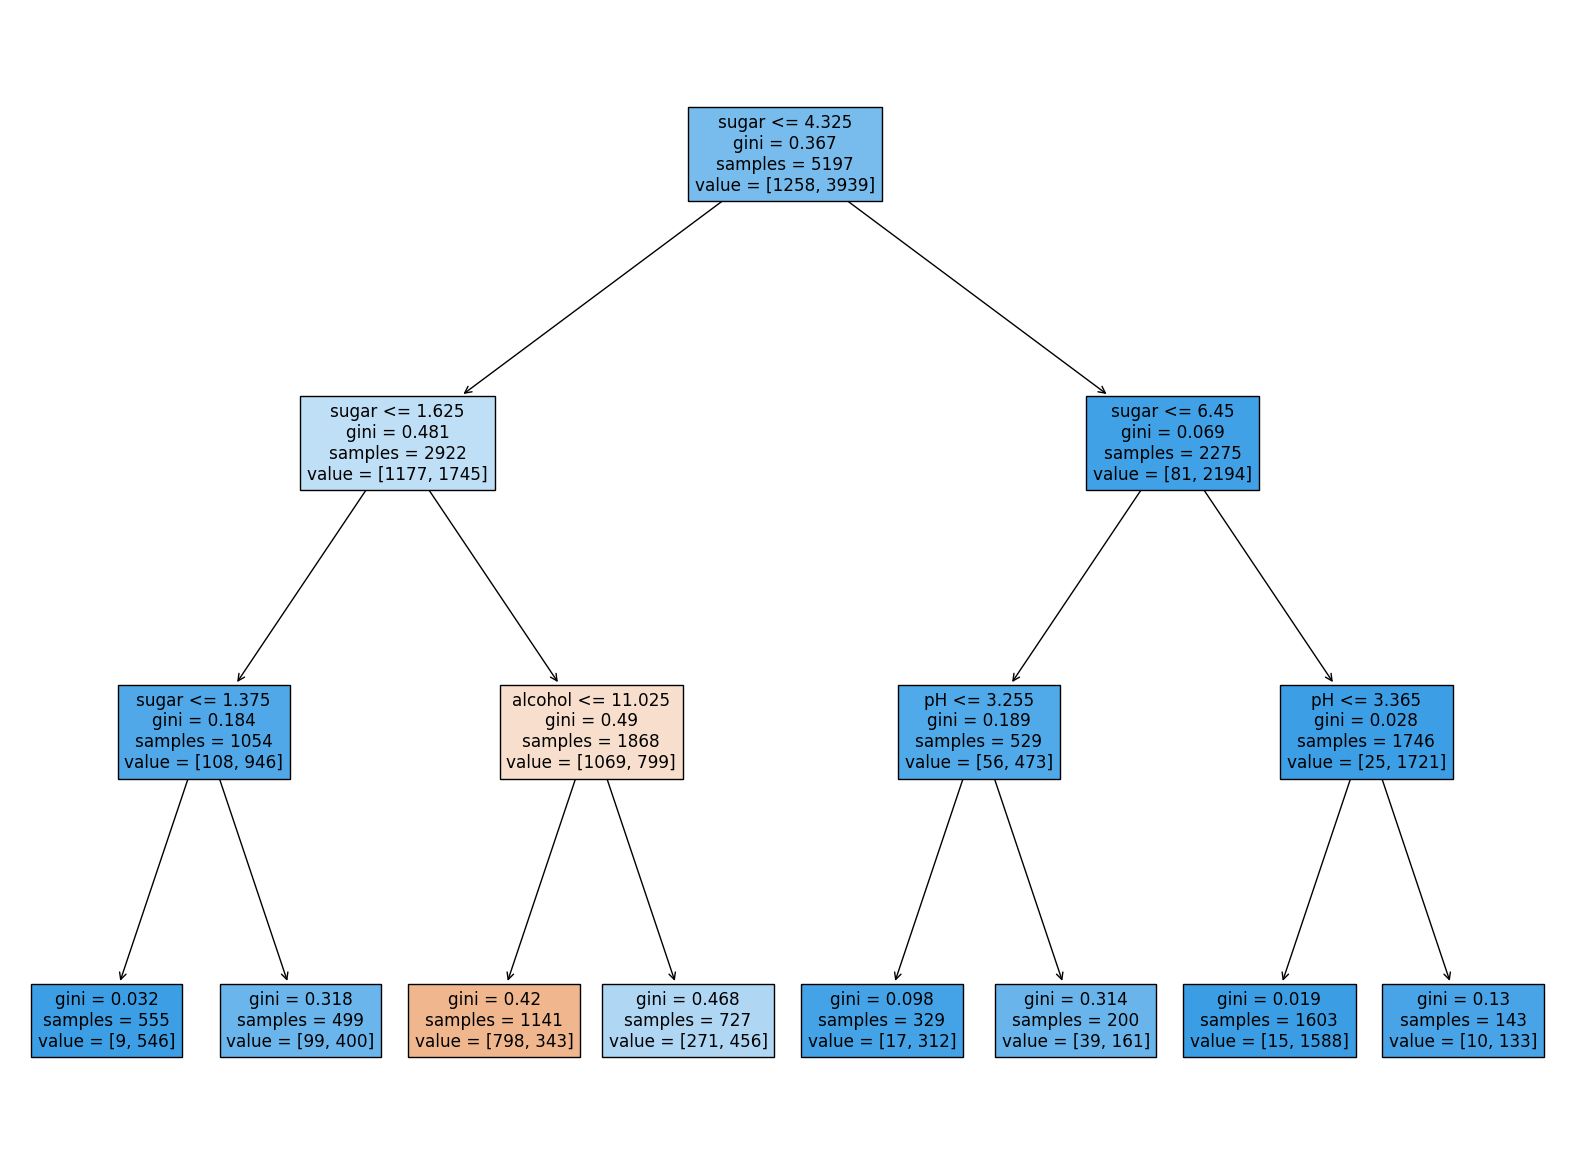

In [17]:
# 당도가 1.625 이하인 와인 중 알콜 도수가 11.025 이하인 것이 레드 와인

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names = ['alcohol','sugar','pH'])
plt.show()

In [18]:
# 특성 중요도: Decision Tree에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값 (당도 > 알콜> pH)
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


# Cross Validation & Grid Search

In [19]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [20]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [21]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [22]:
# train_input과 train_target을 다시 train_test_split()함수에 넣어 훈련세트 sub_input, sub_target과 검증세트 val_input, val_target을 만듦
# train_input의 약 20%를 val_input으로 만듦
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [23]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [25]:
# Cross validation(교차 검증): 검증 세트를 떼어 내어 평가하는 과정을 여러번 반복하고 이 점수를 평균내어 최종 검증 점수를 얻음
# 평가할 모델 객체를 첫번째 매개변수로 전달하고 훈련세트 전체를 함수에 전달함
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00797129, 0.00726032, 0.00756788, 0.0083971 , 0.00714254]), 'score_time': array([0.00119495, 0.00108147, 0.00103092, 0.00128555, 0.00101805]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [26]:
# 교차 검증의 최종 점수는 test_score 키에 담긴 5개의 점수를 평균하여 얻을 수 있음
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [27]:
# 교차 검증을 할 때 훈련 세트를 섞으려면 splitter(분할기)를 지정해야 함
# 주로 회귀모델은 KFold 분할기, 분류모델은 StratifiedKFold 사용
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [28]:
# 훈련 세트를 섞은 후 10-폴드 교차 검증 수행하는 방법
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [29]:
# GridSearchCV 클래스는 하이퍼파라미터 탐색과 교차 검증을 한번에 수행함
# Decision Tree 모델에서 min_impurity_decrease 매개변수의 최적값 찾기
# 탐색할 매개변수와 탐색할 값의 리스트를 딕셔너리로 만듦, 0.0001부터 0.0005까지 0.0001씩 증가하는 5개의 값 시도
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [30]:
# 탐색 대상 모델과 params 변수를 전달하여 그리드 서치 객체를 만듦
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [31]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [32]:
# 그리드 서치는 훈련이 끝나면 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련함
# 이 모델은 gs 객체의 best_estimator_ 속성에 저장되어 있음
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [33]:
# 그리드 서치로 찾은 최적의 매개변수를 best_params_ 속성에 저장되어 있음
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [34]:
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_reults_ 속성의 mean_test_score 키에 저장되어 있음
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [35]:
# argmax() 함수를 사용해 가장 큰 값의 인덱스 추출
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [36]:
# np.arange()함수는 첫번째 매개 변수 값에서 시작해 두번째 매개변수에 도달할 때까지 세번째 매개변수를 계속 더한 배열을 만듦, 두번째 매개변수는 포함 x
# range()도 비슷하지만 정수만 사용 가능
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [37]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [38]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [39]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [40]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.8615384615384616


In [41]:
# 랜덤 서치: 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링 할 수 있는 확률분포 객체를 전달

from scipy.stats import uniform, randint

In [42]:
# 0에서 10사이 범위를 갖는 randint 객체를 만들고 10개의 숫자 샘플링
rgen = randint(0,10)
rgen.rvs(10)

array([9, 7, 8, 9, 2, 8, 1, 2, 5, 2])

In [43]:
# 1000개로 샘플링 숫자를 늘려 각 숫자의 개수 세어보기
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 97,  97,  92,  99, 113, 112,  97,  86, 105, 102]))

In [44]:
# randint는 정숫값, uniform은 실숫값을 뽑음
ugen = uniform(0,1)
ugen.rvs(10)

array([0.33165506, 0.28363482, 0.09786367, 0.60603191, 0.0248032 ,
       0.93615251, 0.36087269, 0.19092607, 0.00566598, 0.55444223])

In [45]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split': randint(2,25),
          'min_samples_leaf': randint(1,25),
          }

In [46]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e7aadd7a4d0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e7aadd78850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e7aadd79ff0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e7aadd7a410>},
                   random_state=42)

In [47]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [48]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [49]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


# Ensemble

In [50]:
# 랜덤 포레스트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [51]:
# return_train_score=True로 하여 훈련 세트에 대한 점수도 같이 반환(과대적합 파악에 용이)
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [52]:
# 특성 중요도 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [53]:
# 자체적으로 모델을 평가하는 oob 점수 출력
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [54]:
# 엑스트라 트리
# 랜덤포레스트와 유사하나 부트스트랩 샘플을 사용하지 않고 각 결정 트리를 만들 때 전체 훈련 세트를 사용함
# 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 뿐할함
# 특성을 무작위로 분할한다면 성능이 낮아이지만 많은 트리를 앙상블 하기에 오버피팅을 막고 검증 세트의 점수를 높이는 효과가 있음
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [55]:
# 특성 중요도 출력
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [56]:
# 그레디언트 부스팅
# 깊이가 얕은 결정트리를 사용하기에 오버피팅에 강하고 높은 일반화 성능
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [57]:
# 학습률을 증가시키고 트리의 개수를 늘리면 성능이 향상됨
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [58]:
# 특성 중요도 출력
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [59]:
# 그레디언트 부스팅의 속도와 성능을 개선한 히스토그램 기반 그레디언트 부스팅
# 입력 특성을 256개의 구간으로 나누어 노드를 분할할 때 최적의 분할을 빠르게 찾음
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [60]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [61]:
# 특성 중요도 출력
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [62]:
hgb.score(test_input, test_target)

0.8723076923076923

In [63]:
# XGBoost
# tree_method 매개변수를 'hist'로 지정하여 히스토그램 기반 그레디언트 부스팅 가용
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


#과제

1. 하단 셀에서 lightGBM 구현하기 (상단 Ensemble 셀 모두 실행 후 진행)
2. 그리드 서치, 랜덤 서치 각각 어떤 상황에서 효율적인지 설명
3. 다른 데이터셋으로 Decision Tree regression task 진행해보기
  - 원하는 데이터셋을 사용해도 괜찮고, 올려둔 bike_data 사용해도 괜찮음
  - 직접 구현해보는 것이 어렵다면 'bike sharing data decision tree regressor' 키워드로 검색 후 참고


## 과제1

In [65]:
# 과제 1: lightGBM 구현하기
from lightgbm import LGBMClassifier

# LGBMClassifier 객체를 생성, random_state를 42로 설정
lgb = LGBMClassifier(random_state=42)

# cross_validate 함수를 사용해 모델을 교차 검증
# train_input과 train_target 데이터를 사용, return_train_score=True로 설정 -> 훈련 세트에 대한 점수 반환
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

# 교차 검증 결과의 훈련 세트 점수와 테스트 세트 점수의 평균 계산
print("LightGBM - Mean Train Score:", np.mean(scores['train_score']))
print("LightGBM - Mean Test Score:", np.mean(scores['test_score']))

LightGBM - Mean Train Score: 0.935828414851749
LightGBM - Mean Test Score: 0.8801251203079884


##과제2
답: 그리드 서치는 하이퍼파라미터의 모든 조합을 시도해 최적의 조합을 찾는 만큼 이들 간 독립적인 영향을 미치는 경우 효율적이며, 랜덤 서치는 무작위의 하이퍼파리미터 값을 설정하므로 이들 간의 상호작용이 강하거나 탐색 공간이 커서 그리드 서치로 탐색하기 어려운 경우 효율적이다.

In [66]:
# 그리드 서치 파라미터 설정
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(lgb, param_grid, cv=5, n_jobs=-1)

# 그리드 서치로 최적의 조합 탐색
grid_search.fit(train_input, train_target)

print("Grid Search - Best Parameters:", grid_search.best_params_)
print("Grid Search - Best Mean Test Score:", grid_search.best_score_)

Grid Search - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 500}
Grid Search - Best Mean Test Score: 0.8830123269415859


In [67]:
# 랜덤 서치 파라미터 설정
random_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30]
}

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(lgb, random_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# 랜덤 서치로 최적의 조합 탐색
random_search.fit(train_input, train_target)

print("Random Search - Best Parameters:", random_search.best_params_)
print("Random Search - Best Mean Test Score:", random_search.best_score_)

Random Search - Best Parameters: {'n_estimators': 100, 'min_child_samples': 10, 'max_depth': 7, 'learning_rate': 0.1}
Random Search - Best Mean Test Score: 0.8818568149848227


그리드 서치 : 76초 소요

랜덤 서치 : 6초 소요

## 과제3

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
hour_df = pd.read_csv("/content/drive/MyDrive/hour.csv")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# One-hot 인코딩 변환
hour_df = pd.get_dummies(hour_df, columns=['dteday'])

# 특성과 타겟 분리
X = hour_df.drop('cnt', axis=1)
y = hour_df['cnt']

# 훈련 세트와 테스트 세트 분리
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 회귀 모델 객체 생성
dt_regressor = DecisionTreeRegressor(random_state=42)

# 모델 학습
dt_regressor.fit(train_X, train_y)

# 테스트 세트 예측
predictions = dt_regressor.predict(test_X)

# 모델 평가
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

print("MSE :", mse)
print("R2 :", r2)

MSE : 31.30523590333717
R2 : 0.9990113744119504


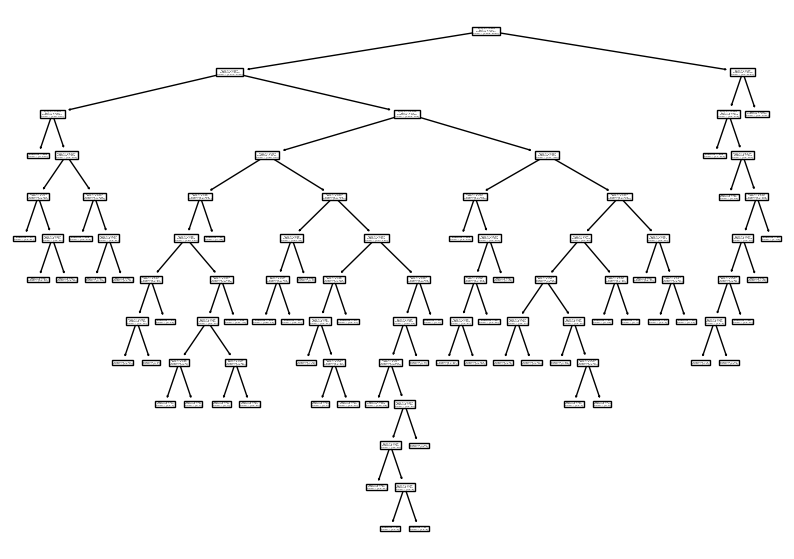

In [89]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

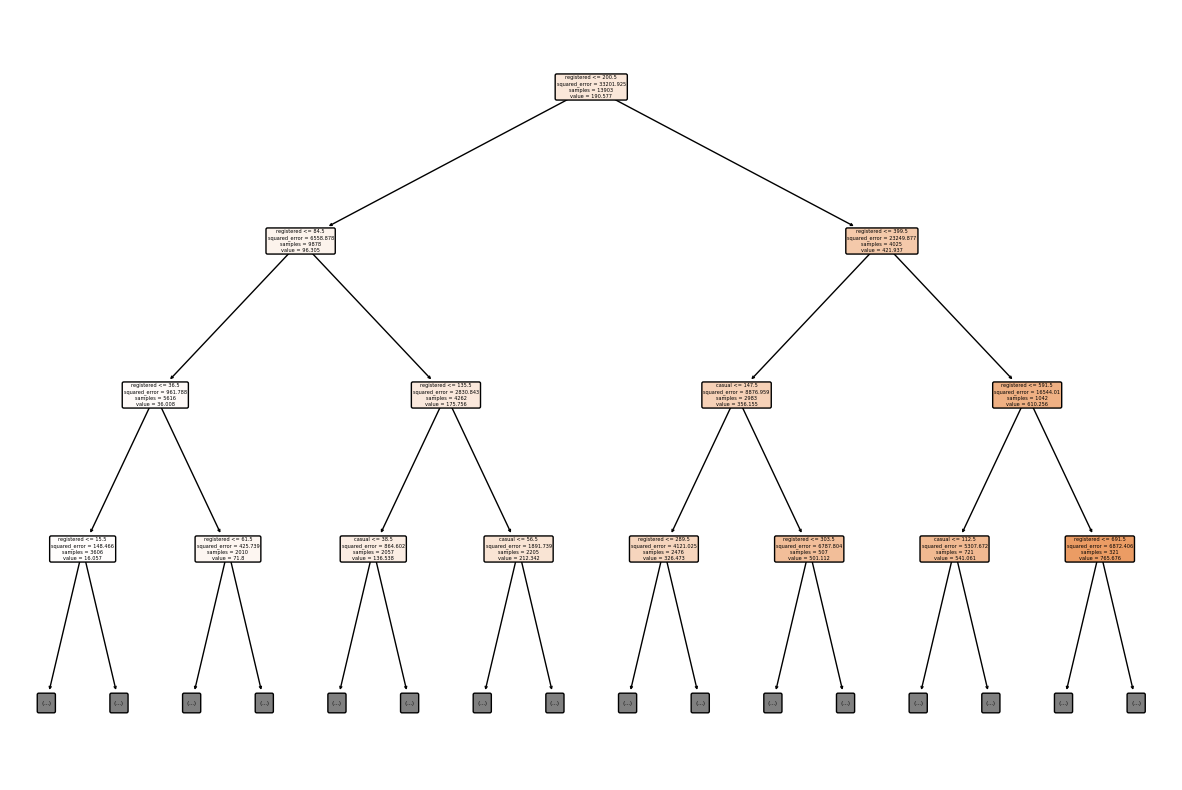

In [90]:
plt.figure(figsize=(15, 10))
plot_tree(dt_regressor, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.show()